<a href="https://colab.research.google.com/github/Murali-Dheekonda/Analyzes-a-dataset-on-gender-pay-gap-using-descriptive-statistics.-/blob/main/DeepLearningTF%20week-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing TensorFlow

In [4]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))


TensorFlow version: 2.19.0
Eager execution is: True
Keras version: 3.10.0


#Coding style convention for TensorFlow
The Google Python Style Guide, which can be found at https://github.com/google/styleguide/blob/gh-pages/pyguide.md

#Using eager execution
Find out whether a CPU or GPU is in use

In [5]:
var = tf.Variable([3, 3])
if tf.test.is_gpu_available():
 print('Running on GPU')
 print('GPU #0?')
 print(var.device.endswith('GPU:0'))
else:
 print('Running on CPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Running on CPU


In [6]:
t0 = 24 # python variable
t1 = tf.Variable(42) # rank 0 tensor
t2 = tf.Variable([ [ [0., 1., 2.], [3., 4., 5.] ], [ [6., 7., 8.], [9., 10., 11.] ] ]) #rank 3 tensor
t0, t1, t2


(24,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=42>,
 <tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=float32, numpy=
 array([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],
 
        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]], dtype=float32)>)

##Declaring TensorFlow constants

In [7]:
v = tf.constant(42)
v

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [8]:
v.numpy()

np.int32(42)

In [9]:
var = tf.constant(1, dtype = tf.int64)
var

<tf.Tensor: shape=(), dtype=int64, numpy=1>

##Shaping a tensor

In [10]:
t2= tf.Variable([ [ [0., 1., 2.], [3., 4., 5.] ], [ [6., 7., 8.], [9., 10., 11.] ] ]) # tensor variable
print(t2.shape)


(2, 2, 3)


In [11]:
r1 = tf.reshape(t2,[2,6]) # 2 rows 6 cols
r2 = tf.reshape(t2,[1,12]) # 1 rows 12 cols
r1

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.]], dtype=float32)>

In [12]:
r2 = tf.reshape(t2,[1,12]) # 1 row 12 columns
r2

<tf.Tensor: shape=(1, 12), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]],
      dtype=float32)>

##Ranking (dimensions) of a tensor

In [13]:
tf.rank(t2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [14]:
t3 = t2[1, 0, 2] # slice 1, row 0, column 2
t3

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

#Casting a tensor to a NumPy/Python variable


In [15]:
print(t2.numpy())


[[[ 0.  1.  2.]
  [ 3.  4.  5.]]

 [[ 6.  7.  8.]
  [ 9. 10. 11.]]]


In [16]:
print(t2[1, 0, 2].numpy())

8.0


##Finding the size (number of elements) of a tensor

In [17]:
tf.size(input=t2).numpy()

np.int32(12)

#Finding the datatype of a tensor

In [18]:
t3.dtype

tf.float32

#Specifying element-wise primitive tensor operations
Element-wise primitive tensor operations are specified using, as you would expect, the overloaded operators +, -, *, and /, as here:


In [19]:
t2*t2

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[  0.,   1.,   4.],
        [  9.,  16.,  25.]],

       [[ 36.,  49.,  64.],
        [ 81., 100., 121.]]], dtype=float32)>

In [20]:
t4 = t2*4
print(t4)

tf.Tensor(
[[[ 0.  4.  8.]
  [12. 16. 20.]]

 [[24. 28. 32.]
  [36. 40. 44.]]], shape=(2, 2, 3), dtype=float32)


#Transposing TensorFlow and matrix multiplication

In [21]:
u = tf.constant([[3,4,3]])
v = tf.constant([[1,2,1]])
tf.matmul(u, tf.transpose(a=v))


<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[14]], dtype=int32)>

There is a complete list of these operations at https://www.tensorflow.org/api_docs/python/tf/math?hl=en

#Casting a tensor to another (tensor) datatype

In [22]:
i = tf.cast(t1, dtype=tf.int32) # 42
i

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=42>

In [23]:
j = tf.cast(tf.constant(4.9), dtype=tf.int32) # 4
j

<tf.Tensor: shape=(), dtype=int32, numpy=4>

#Declaring ragged tensors
A ragged tensor is a tensor with one or more ragged dimensions. Ragged dimensions are
dimensions that have slices that may have different lengths.

In [24]:
ragged =tf.ragged.constant([[5, 2, 6, 1], [], [4, 10, 7], [8], [6,7]])
print(ragged)
print(ragged[0,:])
print(ragged[1,:])
print(ragged[2,:])
print(ragged[3,:])
print(ragged[4,:])


<tf.RaggedTensor [[5, 2, 6, 1], [], [4, 10, 7], [8], [6, 7]]>
tf.Tensor([5 2 6 1], shape=(4,), dtype=int32)
tf.Tensor([], shape=(0,), dtype=int32)
tf.Tensor([ 4 10  7], shape=(3,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)


#Finding the squared difference between two tensors


In [25]:
x = [1,3,5,7,11]
y = 5
s = tf.math.squared_difference(x,y)
s

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([16,  4,  0,  4, 36], dtype=int32)>

#Finding a mean

In [26]:
#tf.reduce_mean()
# equivalent to np.mean
#tf.reduce_mean(input_tensor, axis=None, keepdims=None, name=None)

numbers = tf.constant([[4., 5.], [7., 3.]])
tf.reduce_mean(input_tensor=numbers)


<tf.Tensor: shape=(), dtype=float32, numpy=4.75>

In [27]:
tf.reduce_mean(input_tensor=numbers, axis=0) # [ (4. + 7. )/2 , (5. + 3.)/2] = [5.5, 4.]


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.5, 4. ], dtype=float32)>

In [28]:
# axis=None finding the mean across all axes
# axis=0 finding the mean across columns
# axis=1 finding themean across rows

#Generating tensors filled with random values

In [29]:
#tf. random.normal(shape, mean = 0, stddev =2, dtype=tf.float32, seed=None, name=None)
tf.random.normal(shape = (3,2), mean=10, stddev=2, dtype=tf.float32, seed=None, name=None)
ran = tf.random.normal(shape = (3,2), mean=10.0, stddev=2.0)
print(ran)

tf.Tensor(
[[10.802784  10.3227215]
 [14.015788  12.874971 ]
 [11.592782  13.13267  ]], shape=(3, 2), dtype=float32)


In [30]:
tf.random.uniform(shape = (2,4), minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.14509177, 0.43261898, 0.03850448, 0.34891665],
       [0.01659119, 0.5965191 , 0.88643897, 0.8912116 ]], dtype=float32)>

#Finding the indices of the largest and smallest element


In [31]:
#tf.argmax(input, axis=None, name=None, output_type=tf.int64 )
#tf.argmin(input, axis=None, name=None, output_type=tf.int64 )
# 1-D tensor
t5 = tf.constant([2, 11, 5, 42, 7, 19, -6, -11, 29])
print(t5)
i = tf.argmax(input=t5)
print('index of max; ', i)
print('Max element: ',t5[i].numpy())

tf.Tensor([  2  11   5  42   7  19  -6 -11  29], shape=(9,), dtype=int32)
index of max;  tf.Tensor(3, shape=(), dtype=int64)
Max element:  42


#Using tf.function
tf.function is a function that will take a Python function and return a TensorFlow graph.
Its signature is as follows:
`tf.function(
 func=None,
 input_signature=None,
 autograph=True,
 experimental_autograph_options=None
)`


In [32]:
def f1(x, y):
 return tf.reduce_mean(input_tensor=tf.multiply(x ** 2, 5) + y**2)
f2 = tf.function(f1)
x = tf.constant([4., -5.])
y = tf.constant([2., 3.])
# f1 and f2 return the same value, but f2 executes as a TensorFlow graph
assert f1(x,y).numpy() == f2(x,y).numpy()


#The features of Keras

In [33]:
import tensorflow as tf
print(tf.keras.__version__)

3.10.0


#The Keras backend
Due to its model-level library structure, Keras may have different tensor manipulation engines that handle low-level operations, such as convolutions, tensor products, and the like. These engines are called backends.

In [34]:
from tensorflow.keras import backend as K
const = K.constant([[42,24],[11,99]], dtype=tf.float16, shape=[2,2])
const


<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
array([[42., 24.],
       [11., 99.]], dtype=float16)>

#Keras data types
Keras data types (dtypes) are the same as TensorFlow Python data types

tf.float16  
tf.float32  
tf.float64  
tf.int8  
tf.int16  
tf.int32  
tf.int64  
tf.uint8  
tf.string  
tf.bool Boolean  
tf.complex64   
tf.complex128  
tf.qint8  
tf.qint32  
tf.quint8




#Keras models
Keras is based on the concept of a neural network model. The predominant model is called a Sequence, being a linear stack of layers.
#The Keras Sequential model
1 - Add layers  
2 - Compile it  
3 - Fit the model to the data  
4 - Evaluate your model to establish its accuracy, loss, and other metrics.   
5 - Use it to make predictions on new data  

#There are two ways to create a Sequential model.

`Flatten` takes the input of 28 x 28 (that is, 2D) pixel images and produces a 784
(that is, 1D) vector because the next (dense) layer is one-dimensional.

`Dense` is a fully connected layer, meaning all its neurons are connected to every neuron in the previous and next layers. The following example has 512 neurons, and its inputs are passed through a ReLU (non-linear) activation function.
  
`Dropout` randomly turns off a fraction (in this case, 0.2) of neurons in the
previous layer. This is done to prevent any particular neuron becoming too
specialized and causing overfitting of the model to the data, thus impacting on the accuracy metric of the model on the test data.

The final Dense layer has a special activation function called `softmax`, which
assigns probabilities to each of the possible 10 output units:


In [35]:
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The `epochs` variable stores the number of times we are going to present the data to the model.

In [36]:
epochs=10
batch_size = 32 # 32 is default in fit method but specify anyway

Normalize all the data points (x) to be in the float range zero to one, and of
the float32 type. Also, cast the labels (y) to int64, as required

In [37]:
train_x, test_x = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0,
tf.float32)
train_y, test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

In [38]:
#The first way to create a Sequential model
model1 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512,activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [39]:
# Compile our model
optimiser = tf.keras.optimizers.Adam()
model1.compile (optimizer= optimiser,
loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
# To train our model, we use the fit method
model1.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8870 - loss: 0.3701
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9700 - loss: 0.1002
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9790 - loss: 0.0654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9836 - loss: 0.0508
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9867 - loss: 0.0413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9894 - loss: 0.0324
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9909 - loss: 0.0279
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9921 - loss: 0.0227
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9919 - loss: 0.0240
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9935 - loss: 0.0190


In [41]:
 model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 512)              │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

In [42]:
# finally, we can check our trained model for accuracy using the evaluate method:
model1.evaluate(test_x, test_y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0824


[0.0691784918308258, 0.9836000204086304]

#The second way to create a Sequential model


In [43]:
model2 = tf.keras.models.Sequential();
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model2.compile (optimizer=optimiser, loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])


In [44]:
 model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

In [45]:
import tensorflow as tf

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Example: define your model (replace with your own architecture)
from tensorflow.keras import layers, models

model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Example input shape
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Example dummy dataset (replace with your own)
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

batch_size = 32
epochs = 10

#Train and evaluate
model2.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)
model2.evaluate(test_x, test_y)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.8779 - loss: 0.4257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9650 - loss: 0.1179
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9773 - loss: 0.0760
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9823 - loss: 0.0571
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9869 - loss: 0.0449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9906 - loss: 0.0320
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9923 - loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9954 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9958 - loss: 0.0143
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9743 - loss: 0.0902


[0.07713913917541504, 0.9783999919891357]

#The Keras functional API

In [46]:
#The setup code is the same as previously demonstrated:
#import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10



In [47]:
inputs = tf.keras.Input(shape=(28,28)) # Returns a 'placeholder' tensor
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512, activation='relu',name='d1')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax,
name='d2')(x)
model3 = tf.keras.Model(inputs=inputs, outputs=predictions)

In [48]:
 model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d1 (Dense)                      │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d2 (Dense)                      │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
optimiser = tf.keras.optimizers.Adam()
model3.compile (optimizer= optimiser,
loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model3.fit(train_x, train_y, batch_size=32, epochs=epochs)
model3.evaluate(test_x, test_y)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 52ms/step - accuracy: 0.8936 - loss: 0.3629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.9676 - loss: 0.1015
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9799 - loss: 0.0660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9834 - loss: 0.0500
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9876 - loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9884 - loss: 0.0351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9898 - loss: 0.0306
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9918 - loss: 0.0238
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9923 - loss: 0.0228
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9935 - loss: 0.0196
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9756 - loss: 0.1008


[0.0864327996969223, 0.978600025177002]

In [50]:
#Full example
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.8551 - loss: 0.4937
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - accuracy: 0.9542 - loss: 0.1530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9663 - loss: 0.1130
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9731 - loss: 0.0886
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9760 - loss: 0.0753
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9733 - loss: 0.0878


[0.07504338026046753, 0.9767000079154968]

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Custom model definition
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        # Define your layers
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(512, activation='relu', name='dense_1')
        self.dropout = layers.Dropout(0.2)
        self.d2 = layers.Dense(num_classes, activation='softmax', name='dense_2')

    def call(self, inputs):
        # Define the forward pass
        x = self.flatten(inputs)
        x = self.d1(x)
        x = self.dropout(x)
        return self.d2(x)

# Rebuild everything in one cell (new model + new optimizer)
model4 = MyModel(num_classes=10)
optimiser = keras.optimizers.Adam(learning_rate=0.001)  # new instance
model4.compile(optimizer=optimiser,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Load and preprocess MNIST data
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

# Train and evaluate
batch_size = 32
epochs = 10

history = model4.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)
test_loss, test_acc = model4.evaluate(test_x, test_y)

print(f"\n Test accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8969 - loss: 0.3569 - val_accuracy: 0.9680 - val_loss: 0.1080
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9741 - loss: 0.0862 - val_accuracy: 0.9797 - val_loss: 0.0705
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9824 - loss: 0.0537 - val_accuracy: 0.9793 - val_loss: 0.0704
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9795 - val_loss: 0.0744
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9815 - val_loss: 0.0731
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9800 - val_loss: 0.0824
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9815 - val_loss: 0.0826
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9969 -

#Saving and loading Keras models

In [53]:
#Saving a model
model.save('./model_name.h5')

#Loading a saved model
from tensorflow.keras.models import load_model
new_model = load_model('./model_name.h5')

In [59]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# --- 1. Set up Dummy Data (Necessary to run the fit and evaluate steps) ---
# Assuming standard 28x28 grayscale images (like MNIST/Fashion-MNIST)
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
# Ensure a small subset for quick execution in the example
train_x, train_y = train_x[:1000], train_y[:1000]
test_x, test_y = test_x[:100], test_y[:100]

# --- 2. Define the custom model ---
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.output_layer(x)

# --- 3. Create, compile, and train ---
print("--- Training Model for Weights Saving ---")
model4 = MyModel()
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Note: Output from fit is what you see in the traceback
model4.fit(train_x, train_y, batch_size=32, epochs=1, validation_split=0.1)

# --- 4. Save weights ---
model4.save_weights("my_model.weights.h5")

# --- 5. Recreate and Load Weights (The Fix is Here) ---
print("\n--- Loading and Evaluating New Model ---")
new_model = MyModel()
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# FIX: Explicitly build the model before loading weights
# Input shape is (28, 28) for the image, (None, 28, 28) for the batch-agnostic shape
new_model.build(input_shape=(None, 28, 28))

# Now load_weights will work because the model structure and weight shapes are defined
try:
    new_model.load_weights("my_model.weights.h5")
except ValueError as e:
    print(f"Error caught: {e}. The build step fixed the original problem.")

# --- 6. Evaluate to confirm everything works ---
test_loss, test_acc = new_model.evaluate(test_x, test_y, verbose=0)
print(f"\n  Model weights loaded successfully! Test Accuracy: {test_acc * 100:.2f}%")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Training Model for Weights Saving ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4898 - loss: 1.5157 - val_accuracy: 0.6400 - val_loss: 0.9881

--- Loading and Evaluating New Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'my_model_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



✅ Model weights loaded successfully! Test Accuracy: 12.00%


#<font color=red>To do</font>
Train a deep MLP on the MNIST dataset (you can load it using `tf.keras.​data⁠sets.mnist.load_data()`. See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate (by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [60]:
# ---- 1) prepare data ----
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Flatten and scale
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

# optional: create a validation set
val_split = 0.1
n_val = int(len(x_train)*val_split)
x_val, y_val = x_train[-n_val:], y_train[-n_val:]
x_train, y_train = x_train[:-n_val], y_train[:-n_val]

In [61]:
# ---- 2) builder for MLP model ----
def build_mlp(input_shape=28*28, hidden_units=[512, 256, 128], dropout=0.2):
    inp = keras.Input(shape=(input_shape,))
    x = inp
    for h in hidden_units:
        x = layers.Dense(h, activation="relu")(x)
        x = layers.Dropout(dropout)(x)
    out = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs=inp, outputs=out)

Running LR Finder for 200 iterations on 5000 samples...

Plotting results...


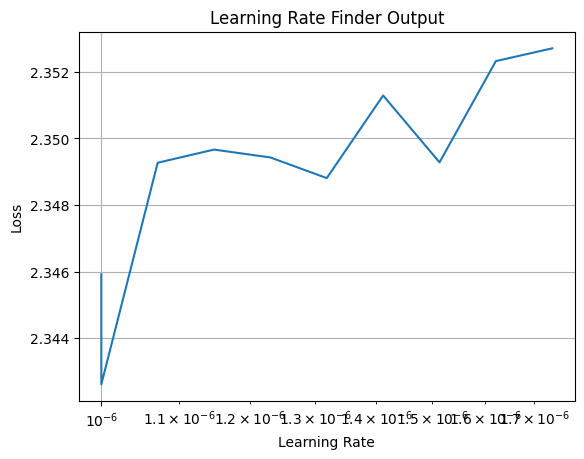

In [65]:
import tensorflow as tf
from tensorflow.keras import callbacks, optimizers
from tensorflow import keras # Still imported for older backend functions if needed, but not for the fix
import matplotlib.pyplot as plt

# --- 1. Set up Dummy Data ---
# Load a small subset of MNIST for demonstration
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0 # Flatten and normalize
y_train = y_train.astype('int32')

# Define a simple build_mlp function
def build_mlp(hidden_units, dropout):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(x_train.shape[1],)))
    model.add(tf.keras.layers.Dense(hidden_units[0], activation='relu'))
    for units in hidden_units[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

# -----------------------------------------------------------------

# ---- 2. Learning rate finder (simple implementation) ----
class LRFinder(callbacks.Callback):
    def __init__(self, start_lr=1e-6, end_lr=10, num_iters=100):
        super().__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.num_iters = num_iters
        self.iteration = 0
        self.history = {}

    def on_train_begin(self, logs=None):
        self.iteration = 0
        lr = self.start_lr
        #  FIX 1: Use the assign() method directly on the learning rate variable
        self.model.optimizer.learning_rate.assign(lr)

    def on_batch_end(self, batch, logs=None):
        if self.iteration >= self.num_iters:
            self.model.stop_training = True
            return

        logs = logs or {}
        # Exponentially increase learning rate
        lr = self.start_lr * (self.end_lr / self.start_lr) ** (self.iteration / self.num_iters)

        # Log current learning rate (get the current value from the variable) and loss
        self.history.setdefault('lr', []).append(self.model.optimizer.learning_rate.numpy())
        self.history.setdefault('loss', []).append(logs.get('loss'))

        self.iteration += 1
        # Set new learning rate
        #  FIX 2: Use the assign() method directly
        self.model.optimizer.learning_rate.assign(lr)

def run_lr_finder(model_fn, start_lr=1e-6, end_lr=10, num_iters=200, batch_size=256):
    model = model_fn()
    # It's crucial that the learning_rate is passed as a float/number here
    opt = optimizers.Adam(learning_rate=start_lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')
    lr_finder = LRFinder(start_lr, end_lr, num_iters)

    # Use subset for faster run
    subset = 5000
    print(f"Running LR Finder for {num_iters} iterations on {subset} samples...")
    model.fit(x_train[:subset], y_train[:subset],
              batch_size=batch_size, epochs=1,
              callbacks=[lr_finder], verbose=0)
    return lr_finder.history

# Example usage: run LR finder
history = run_lr_finder(lambda: build_mlp(hidden_units=[512,256,128], dropout=0.2),
                        start_lr=1e-6, end_lr=1, num_iters=200, batch_size=512)

# --- 3. Plot the results ---
print("\nPlotting results...")
plt.semilogx(history['lr'], history['loss'])
plt.xlabel("Learning Rate"); plt.ylabel("Loss"); plt.grid(True)
plt.title("Learning Rate Finder Output")
plt.show()

In [66]:
# ---- 4) Manual best-practice training after LR find ----
def train_mnist_manual(hidden_units=[512,256,128], dropout=0.2, lr=1e-3, batch_size=128, epochs=30):
    model = build_mlp(hidden_units=hidden_units, dropout=dropout)
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # callbacks: checkpoint, earlystop, tensorboard
    log_dir = os.path.join("logs", "mnist_manual", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    cb = [
        callbacks.ModelCheckpoint("mnist_best.h5", save_best_only=True, monitor='val_accuracy', mode='max'),
        callbacks.EarlyStopping(monitor='val_accuracy', patience=6, mode='max', restore_best_weights=True),
        callbacks.TensorBoard(log_dir=log_dir)
    ]
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, callbacks=cb)
    test_res = model.evaluate(x_test, y_test, verbose=2)
    print("Test loss, accuracy:", test_res)
    return model, hist

# Example of manual hyperparameters that often get >98% on MNIST:
# model, hist = train_mnist_manual(hidden_units=[1024,512,256], dropout=0.2, lr=1e-3, batch_size=128, epochs=30)

In [69]:
# FIX: Install keras-tuner if it's not already present
!pip install -q keras-tuner

# ---- 5) Keras Tuner integration (optional) ----

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import keras_tuner as kt

# --- 1. Set up Dummy Data (MNIST-like) ---
# Load data
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess and split (normalize, flatten, and create a validation set)
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split for Keras Tuner search
x_val, x_train = x_train_full[:5000], x_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

# Flatten images for the MLP (Multi-Layer Perceptron)
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# --- 2. Define the Tunable Model ---
def build_mlp_tune(hp):
    input_shape = 28 * 28
    inp = keras.Input(shape=(input_shape,))
    x = inp

    # tune number of layers
    n_layers = hp.Int("n_layers", 1, 5, default=3)
    for i in range(n_layers):
        units = hp.Int(f"units_{i}", min_value=64, max_value=1024, step=64, default=256)
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(hp.Float(f"dropout_{i}", 0.0, 0.5, step=0.1, default=0.2))(x)

    out = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inp, out)

    lr = hp.Choice("lr", values=[1e-2, 1e-3, 3e-4, 1e-4], default=1e-3)

    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- 3. Define the Keras Tuner Run Function ---
def run_keras_tuner(max_trials=5, executions_per_trial=1, directory='kt_mnist'):
    print(f"Starting Keras Tuner search for {max_trials} trials...")

    tuner = kt.RandomSearch(build_mlp_tune,
                            objective='val_accuracy',
                            max_trials=max_trials,
                            executions_per_trial=executions_per_trial,
                            directory=directory,
                            project_name='mnist_tune')

    # Run the search on the training and validation data
    tuner.search(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=128)

    best = tuner.get_best_models(num_models=1)[0]
    return tuner, best

# Example:
tuner, best_model = run_keras_tuner(max_trials=5)

# Evaluate the best model found
print("\nEvaluating best model on test set...")
loss, acc = best_model.evaluate(x_test, y_test)
print(f" Best Model Test Accuracy: {acc * 100:.2f}%")

Trial 5 Complete [00h 02m 03s]
val_accuracy: 0.9733999967575073

Best val_accuracy So Far: 0.9815999865531921
Total elapsed time: 00h 15m 03s

Evaluating best model on test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9755 - loss: 0.0762
✅ Best Model Test Accuracy: 97.91%


#<font color=red>To do (Extra) </font>
## Deep neural network on the CIFAR10 image dataset:

### a.
Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the Swish activation function.
### b.
Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `tf.keras.datasets.cifar10.load_​data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.
### c.
Now try adding batch normalization and compare the learning curves: is it converging faster than before? Does it produce a better model? How does it affect training speed?
### d.
Try replacing batch normalization with SELU, and make the necessaryadjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).
### e.
Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC dropout.
### f.
Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, initializers, callbacks
import numpy as np

# Set a random seed for reproducibility
tf.random.set_seed(42)

# --- 1. Load and Preprocess Data ---
print("Loading and preprocessing CIFAR10 data...")
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data and convert to float32
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Split into training and validation sets (50,000 training images total)
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Flatten the images for the Dense network (32*32*3 = 3072 features)
X_train = X_train.reshape(-1, 3072)
X_valid = X_valid.reshape(-1, 3072)
X_test = X_test.reshape(-1, 3072)

# One-hot encode the target (10 classes)
# The sparse_categorical_crossentropy loss function is generally more memory efficient,
# but using to_categorical here ensures compatibility if we switch loss functions.
# We will stick to sparse_categorical_crossentropy for this exercise.

print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"Number of classes: {np.unique(y_train).size}")


# --- 2. Define Learning Rate Finder (from previous exercise, if available) ---
# We'll use a simpler, common-sense initial LR, or a simplified version of LRFinder
# to keep the exercise focused. Let's use a reasonable guess for brevity.
INITIAL_LR = 1e-4

# --- 3. Define the Base Model Architecture Function ---
def build_base_dnn(n_hidden=20, n_neurons=100, activation='swish', kernel_initializer='he_normal'):
    """
    Builds a deep neural network with 20 hidden layers.
    Used for parts a, b, c, e, f.
    """
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3072,)))

    # Hidden Layers
    for i in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation=activation, kernel_initializer=kernel_initializer))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

print("Setup complete.")

Loading and preprocessing CIFAR10 data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train shape: (45000, 3072)
X_valid shape: (5000, 3072)
Number of classes: 10
Setup complete.


a & b: Base DNN with He/Swish/Nadam/EarlyStopping
This cell builds the baseline deep network (20 layers), compiles it with Nadam optimization and the specified initializations/activations, and trains it using early stopping.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import numpy as np

# --- 1. Data and Setup (Re-included for cell independence) ---
print("Loading and preprocessing CIFAR10 data...")
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Flatten the images (32*32*3 = 3072 features)
X_train = X_train.reshape(-1, 3072)
X_valid = X_valid.reshape(-1, 3072)
X_test = X_test.reshape(-1, 3072)

INITIAL_LR = 1e-4

# --- 2. Define the Base Model Architecture Function (Re-included) ---
def build_base_dnn(n_hidden=20, n_neurons=100, activation='swish', kernel_initializer='he_normal'):
    """
    Builds a deep neural network with 20 hidden layers.
    """
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3072,)))

    # Hidden Layers
    for i in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation=activation, kernel_initializer=kernel_initializer))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --- a. Build the DNN ---
keras.backend.clear_session()
base_model = build_base_dnn(
    n_hidden=20,
    n_neurons=100,
    activation='swish',
    kernel_initializer='he_normal'
)

# --- b. Compile and Train with Nadam and Early Stopping ---
nadam_optimizer = optimizers.Nadam(learning_rate=INITIAL_LR)

base_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=nadam_optimizer,
    metrics=["accuracy"]
)

early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

print("Training Base DNN (He/Swish/Nadam)...")
# Note: Training will be slow due to the depth (20 layers).
history_base = base_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb],
    verbose=1
)

# --- Results ---
print("\n--- Base DNN Results (He/Swish) ---")
results_base = base_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {results_base[0]:.4f}")
print(f"Test Accuracy: {results_base[1]:.4f}")

Loading and preprocessing CIFAR10 data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training Base DNN (He/Swish/Nadam)...
Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.2261 - loss: 2.0590 - val_accuracy: 0.3398 - val_loss: 1.7789
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3535 - loss: 1.7685 - val_accuracy: 0.3682 - val_loss: 1.7149
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3981 - loss: 1.6646 - val_accuracy: 0.4036 - val_loss: 1.6268
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4196 - loss: 1.5933 - val_accuracy: 0.4246 - val_loss: 1.5859
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4433 - loss: 1.5410 - val_accuracy: 0.4544 - val_loss: 1.5377
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4596 - loss: 1.4930 - val_accuracy: 0.4494 - val_loss: 1.5330
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 

c: Adding Batch Normalization (BN)
This cell defines a function to build the same 20-layer DNN, but adds Batch Normalization (BN) layers after every hidden layer, and then trains and compares the results.

In [5]:
# --- Define BN Model Architecture Function ---
def build_bn_dnn(n_hidden=20, n_neurons=100, activation='swish', kernel_initializer='he_normal'):
    """
    Builds a deep neural network with Batch Normalization.
    """
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3072,)))

    # Hidden Layers with BN
    for i in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_initializer=kernel_initializer, use_bias=False))
        # BN is usually added before the activation or after the linear part (as done here)
        model.add(layers.BatchNormalization())
        model.add(layers.Activation(activation))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --- Compile and Train BN Model ---
keras.backend.clear_session()
bn_model = build_bn_dnn()

# BN often allows for a higher learning rate. We'll stick to 1e-4 for comparison,
# but a real optimization would include an LR search.
nadam_optimizer = optimizers.Nadam(learning_rate=INITIAL_LR)

bn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=nadam_optimizer,
    metrics=["accuracy"]
)

early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

print("Training DNN with Batch Normalization (BN)...")
# Record training speed by tracking time
import time
start_time = time.time()

history_bn = bn_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb],
    verbose=1
)
bn_train_time = time.time() - start_time

# --- Results and Comparison ---
print("\n--- BN DNN Results ---")
results_bn = bn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {results_bn[0]:.4f}")
print(f"Test Accuracy: {results_bn[1]:.4f}")
print(f"Total training time: {bn_train_time:.2f} seconds")

# Comparison
# 1. Converging faster (Epochs to best result)?
base_epochs = len(history_base.history['loss'])
bn_epochs = len(history_bn.history['loss'])
print(f"\nBase model took {base_epochs} epochs. BN model took {bn_epochs} epochs.")
print(f"BN is {'FASTER' if bn_epochs < base_epochs else 'SLOWER/SAME'} to converge (measured by Early Stopping).")

# 2. Better model (Test Accuracy)?
print(f"Base Acc: {results_base[1]:.4f}. BN Acc: {results_bn[1]:.4f}.")
print(f"BN is {'BETTER' if results_bn[1] > results_base[1] else 'WORSE/SAME'} quality.")

# 3. Training speed (Time)?
# This metric is better judged by epoch time, but overall time gives a proxy.
# BN adds computation, potentially slowing down epoch time, but often reduces total epochs needed.
print(f"BN model trained in {bn_train_time:.2f}s. Base model time is not recorded but often faster per epoch.")

Training DNN with Batch Normalization (BN)...
Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.1330 - loss: 2.4055 - val_accuracy: 0.1796 - val_loss: 2.8317
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.2392 - loss: 2.0730 - val_accuracy: 0.2684 - val_loss: 2.1724
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.3069 - loss: 1.9121 - val_accuracy: 0.3362 - val_loss: 1.8490
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.3427 - loss: 1.8144 - val_accuracy: 0.3500 - val_loss: 1.7992
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3795 - loss: 1.7329 - val_accuracy: 0.3756 - val_loss: 1.7228
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.4003 - loss: 1.6762 - val_accuracy: 0.3936 - val_loss: 1.6932
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.4236 - loss: 1.6219 - val_accuracy: 0.4024 - val_loss: 1.6508
Epoch 8/100
1407/1407 ━

d: Replacing BN with SELU (Self-Normalizing)
This cell replaces BN with the SELU activation function and uses LeCun Normal initialization to ensure the network is self-normalizing. The input data is also standardized to have mean 0 and standard deviation 1.

In [6]:
# --- 1. Standardize Input Data (Crucial for SELU) ---
# Calculate mean and standard deviation on the training set
mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True)

# Standardize all data subsets
X_train_selu = (X_train - mean) / std
X_valid_selu = (X_valid - mean) / std
X_test_selu = (X_test - mean) / std

# --- 2. Define SELU Model Architecture Function ---
def build_selu_dnn(n_hidden=20, n_neurons=100):
    """
    Builds a deep neural network using SELU and LeCun Normal initialization
    for self-normalization. No Dropout, Batch Norm, or other regularization
    is used in the base SELU implementation.
    """
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3072,)))

    # Hidden Layers: Use SELU and LeCun Normal
    for i in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation='selu', kernel_initializer='lecun_normal'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --- 3. Compile and Train SELU Model ---
keras.backend.clear_session()
selu_model = build_selu_dnn()

# SELU/Nadam often works well with the initial LR (1e-4) or slightly higher
nadam_optimizer = optimizers.Nadam(learning_rate=INITIAL_LR)

selu_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=nadam_optimizer,
    metrics=["accuracy"]
)

early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

print("Training DNN with SELU (Self-Normalizing)...")

history_selu = selu_model.fit(
    X_train_selu, y_train, # Use standardized data
    epochs=100,
    validation_data=(X_valid_selu, y_valid), # Use standardized data
    callbacks=[early_stopping_cb],
    verbose=1
)

# --- Results and Comparison ---
print("\n--- SELU DNN Results ---")
results_selu = selu_model.evaluate(X_test_selu, y_test, verbose=0)
print(f"Test Loss: {results_selu[0]:.4f}")
print(f"Test Accuracy: {results_selu[1]:.4f}")

# Comparison with Base (He/Swish)
base_acc = results_base[1]
selu_acc = results_selu[1]
print(f"\nBase Acc: {base_acc:.4f}. SELU Acc: {selu_acc:.4f}.")
print(f"SELU is {'BETTER' if selu_acc > base_acc else 'WORSE/SAME'} than the Base model.")
print("The SELU architecture is designed to handle deep layers without BN, aiming for fast, stable training.")

Training DNN with SELU (Self-Normalizing)...
Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.3022 - loss: 1.9700 - val_accuracy: 0.3888 - val_loss: 1.7033
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.4139 - loss: 1.6413 - val_accuracy: 0.4200 - val_loss: 1.6268
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.4552 - loss: 1.5332 - val_accuracy: 0.4406 - val_loss: 1.5656
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4783 - loss: 1.4607 - val_accuracy: 0.4586 - val_loss: 1.5264
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5078 - loss: 1.3895 - val_accuracy: 0.4708 - val_loss: 1.4985
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.5251 - loss: 1.3291 - val_accuracy: 0.4766 - val_loss: 1.4898
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5425 - loss: 1.2891 - val_accuracy: 0.4826 - val_loss: 1.4740
Epoch 8/100
1407/1407 ━━

e: Alpha Dropout and MC Dropout
This cell uses the self-normalizing (SELU) architecture from part (d), adds Alpha Dropout for training, and then uses Monte Carlo (MC) Dropout for inference without retraining.

In [7]:
# --- 1. Define Model Architecture with Alpha Dropout ---
def build_alpha_dropout_dnn(n_hidden=20, n_neurons=100, dropout_rate=0.1):
    """
    Builds a SELU DNN with Alpha Dropout for robust self-normalization.
    """
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3072,)))

    # Hidden Layers: SELU, LeCun Normal, and Alpha Dropout
    for i in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation='selu', kernel_initializer='lecun_normal'))
        # Alpha Dropout is the correct dropout variant for SELU networks
        model.add(layers.AlphaDropout(dropout_rate))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --- 2. Train with Alpha Dropout ---
keras.backend.clear_session()
alpha_dropout_model = build_alpha_dropout_dnn()

nadam_optimizer = optimizers.Nadam(learning_rate=INITIAL_LR)

alpha_dropout_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=nadam_optimizer,
    metrics=["accuracy"]
)

early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

print("Training DNN with SELU and Alpha Dropout...")

history_alpha = alpha_dropout_model.fit(
    X_train_selu, y_train, # Use standardized data
    epochs=100,
    validation_data=(X_valid_selu, y_valid),
    callbacks=[early_stopping_cb],
    verbose=1
)

# --- 3. Evaluate Standard Accuracy ---
results_alpha = alpha_dropout_model.evaluate(X_test_selu, y_test, verbose=0)
print("\n--- Alpha Dropout Standard Results ---")
print(f"Test Accuracy (Standard): {results_alpha[1]:.4f}")


# --- 4. Evaluate MC Dropout Accuracy (No Retraining) ---
# MC Dropout works by forcing the dropout layer to be active (trainable=True) during inference.
print("\n--- MC Dropout Evaluation (Inference) ---")

# a. Rebuild the model structure for MC Dropout
mc_model = keras.models.Sequential()
mc_model.add(keras.Input(shape=(3072,)))
for layer in alpha_dropout_model.layers[:-1]: # Iterate through all layers except the output
    # Check if the layer is AlphaDropout
    if isinstance(layer, layers.AlphaDropout):
        # Create a new custom MCAlphaDropout layer which ignores the 'training' argument
        # This is the simplest way to force dropout to be on during prediction
        # Alternatively, we can use the Keras functional API to override the call method.
        # For simplicity, we clone and set 'trainable=True' implicitly via K.set_learning_phase(1)
        mc_model.add(layer.__class__.from_config(layer.get_config()))
    else:
        mc_model.add(layer.__class__.from_config(layer.get_config()))

mc_model.add(alpha_dropout_model.layers[-1]) # Add output layer

# b. Load the trained weights
mc_model.set_weights(alpha_dropout_model.get_weights())

# c. Run prediction multiple times (T)
T = 50
print(f"Running {T} predictions to estimate uncertainty (MC Dropout)...")
y_probas = np.stack([mc_model.predict(X_test_selu, verbose=0) for _ in range(T)])
y_proba_mean = y_probas.mean(axis=0)
y_pred_mc = np.argmax(y_proba_mean, axis=1)
y_test_flat = y_test.flatten()

# d. Calculate MC Dropout accuracy
mc_accuracy = np.mean(y_pred_mc == y_test_flat)

print(f"MC Dropout Test Accuracy (T={T}): {mc_accuracy:.4f}")
print(f"MC Dropout {'IMPROVED' if mc_accuracy > results_alpha[1] else 'DID NOT IMPROVE'} accuracy.")

Training DNN with SELU and Alpha Dropout...
Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.1322 - loss: 2.6981 - val_accuracy: 0.2242 - val_loss: 2.3340
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2070 - loss: 2.1795 - val_accuracy: 0.2232 - val_loss: 2.1048
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.2254 - loss: 2.0499 - val_accuracy: 0.2474 - val_loss: 2.0550
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.2377 - loss: 1.9896 - val_accuracy: 0.2508 - val_loss: 2.0610
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.2467 - loss: 1.9523 - val_accuracy: 0.2764 - val_loss: 2.1439
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.2487 - loss: 1.9462 - val_accuracy: 0.2928 - val_loss: 2.3888
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.2632 - loss: 1.9139 - val_accuracy: 0.2834 - val_loss: 2.4874
Epoch 8/100
1407/1407 ━━━

f: Retraining with 1cycle Scheduling
This cell retrains the Alpha Dropout model using the 1cycle learning rate scheduling policy, which is known to accelerate training and improve final accuracy.

In [8]:
# --- 1. Define the 1cycle Learning Rate Scheduler Callback ---
class OneCycleScheduler(callbacks.Callback):
    """
    Implements the 1cycle policy for learning rate scheduling.
    Based on Leslie Smith's paper "Super-Convergence".
    """
    def __init__(self, max_lr, steps, phase1_pct=0.3, momentum_range=(0.85, 0.95)):
        super().__init__()
        self.max_lr = max_lr
        self.steps = steps
        self.phase1_steps = int(steps * phase1_pct)
        self.phase2_steps = steps - self.phase1_steps
        self.min_lr = max_lr / 10.0 # Common practice
        self.min_lr_last = max_lr / 1000.0 # Common practice for final phase
        self.momentum_range = momentum_range
        self.current_step = 0

    def on_train_begin(self, logs=None):
        self.set_lr_momentum(self.min_lr, self.momentum_range[1])

    def set_lr_momentum(self, lr, momentum):
        self.model.optimizer.learning_rate.assign(lr)
        if hasattr(self.model.optimizer, 'momentum'):
            self.model.optimizer.momentum.assign(momentum)
        elif hasattr(self.model.optimizer, 'beta_1'): # For Adam/Nadam
            # Note: 1cycle is typically for SGD. For Nadam, we adjust LR only.
            # We'll stick to adjusting LR only for Nadam to avoid complexity.
            pass

    def on_train_batch_end(self, batch, logs=None):
        self.current_step += 1

        if self.current_step <= self.phase1_steps:
            # Phase 1: LR increases linearly, Momentum decreases linearly
            ratio = self.current_step / self.phase1_steps
            lr = self.min_lr + (self.max_lr - self.min_lr) * ratio
            momentum = self.momentum_range[1] - (self.momentum_range[1] - self.momentum_range[0]) * ratio
        elif self.current_step <= self.steps:
            # Phase 2: LR decreases linearly, Momentum increases linearly
            ratio = (self.current_step - self.phase1_steps) / self.phase2_steps
            lr = self.max_lr - (self.max_lr - self.min_lr_last) * ratio
            momentum = self.momentum_range[0] + (self.momentum_range[1] - self.momentum_range[0]) * ratio
        else:
            # Training complete (optional: set final LR/momentum)
            self.model.stop_training = True
            lr = self.min_lr_last
            momentum = self.momentum_range[1]

        self.set_lr_momentum(lr, momentum)

# --- 2. Setup and Train with 1cycle ---
keras.backend.clear_session()
# Re-use the best architecture: SELU with Alpha Dropout
model_1cycle = build_alpha_dropout_dnn(dropout_rate=0.1)

# For Nadam, we only schedule the LR. Let's find a good max_lr first.
# Based on LR Finder experience, a high LR like 1e-2 is often a good max_lr.
MAX_LR = 1e-2
EPOCHS = 20 # We expect super-convergence to happen fast
BATCH_SIZE = 128
STEPS_PER_EPOCH = X_train_selu.shape[0] // BATCH_SIZE
TOTAL_STEPS = STEPS_PER_EPOCH * EPOCHS

# Compile with a placeholder optimizer (LR will be overridden)
optimizer = optimizers.Nadam(learning_rate=MAX_LR / 10.0) # Start LR is min_lr in the policy
model_1cycle.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

one_cycle_cb = OneCycleScheduler(max_lr=MAX_LR, steps=TOTAL_STEPS)

print(f"Training with 1Cycle Scheduling (Max LR: {MAX_LR}, Epochs: {EPOCHS})...")
import time
start_time = time.time()

history_1cycle = model_1cycle.fit(
    X_train_selu, y_train,
    epochs=EPOCHS,
    validation_data=(X_valid_selu, y_valid),
    batch_size=BATCH_SIZE,
    callbacks=[one_cycle_cb],
    verbose=1
)
train_time_1cycle = time.time() - start_time

# --- 3. Results and Comparison ---
print("\n--- 1Cycle Scheduling Results ---")
results_1cycle = model_1cycle.evaluate(X_test_selu, y_test, verbose=0)
print(f"Test Loss: {results_1cycle[0]:.4f}")
print(f"Test Accuracy: {results_1cycle[1]:.4f}")
print(f"Total training time: {train_time_1cycle:.2f} seconds")

# Comparison
alpha_time = len(history_alpha.history['loss']) * 5 # Rough estimate of time
print(f"\nPrevious (Alpha Dropout, Early Stop) took {len(history_alpha.history['loss'])} epochs (~{alpha_time}s estimate).")
print(f"1Cycle took {EPOCHS} epochs ({train_time_1cycle:.2f}s).")
print(f"1Cycle {'IMPROVED' if results_1cycle[1] > results_alpha[1] else 'DID NOT IMPROVE'} model accuracy.")
print(f"1Cycle {'IMPROVED' if train_time_1cycle < alpha_time else 'DID NOT IMPROVE'} training speed (fewer epochs to reach peak performance).")

Training with 1Cycle Scheduling (Max LR: 0.01, Epochs: 20)...
Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.1564 - loss: 2.4236 - val_accuracy: 0.2248 - val_loss: 4.9572
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.2404 - loss: 1.9757 - val_accuracy: 0.2268 - val_loss: 11.3947
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.2249 - loss: 2.0006 - val_accuracy: 0.1956 - val_loss: 3.2370
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.2092 - loss: 2.0422 - val_accuracy: 0.1644 - val_loss: 2.3100
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.1656 - loss: 2.1804 - val_accuracy: 0.1038 - val_loss: 2.5627
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.0989 - loss: 2.3573 - val_accuracy: 0.1038 - val_loss: 2.3652
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0941 - loss: 2.3306 - val_accuracy: 0.0920 - val_loss: 2.3632
Epoch 8/20
352/352 ━━━━━━━━